<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/00_pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

[View Source Code](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/00_pytorch_fundamentals.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/00_pytorch_and_deep_learning_fundamentals.pdf) | [Watch Video Walkthrough](https://youtu.be/Z_ikDlimN6A?t=76) 

# 00. Pytorch Fundamentals

Resource notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/
Check out tutorials =https://pytorch.org/tutorials

github.com/mrdbourke/pytorch-deep-learning/projects?type=beta

Use !nvidia-smi to get gpu info

In [6]:
import torch

from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor

In [7]:
print (torch.__version__)
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
print(torch.cuda.get_device_name(0))


2.5.0
CUDA available: True
CUDA version: 12.4
NVIDIA GeForce RTX 4070 SUPER


In [8]:
!nvidia-smi

Sun Oct 27 13:01:55 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.90                 Driver Version: 565.90         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   32C    P8              8W /  220W |     571MiB /  12282MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Introduction to Tensors
'' Creating tensors
Pytorch are created using torch.tensor() = https://pytorch.org/docs/stable/tensors.html

In [9]:
# scalar
scalar = torch.tensor(7)
scalar



tensor(7)

In [10]:
scalar.ndim
scalar.dtype
# get as python int
scalar.item()

7

In [11]:
#Vector
vect = torch.tensor([2,3])
print(vect)
vect.ndim

tensor([2, 3])


1

In [12]:
vect.shape  # shape is an attribute, getter .size() is a function

torch.Size([2])

In [13]:
#MATRIX
MATRIX=torch.tensor([[1.0,20,],[30.,40.]])
MATRIX.dtype

torch.float32

In [14]:
MATRIX
MATRIX.shape

torch.Size([2, 2])

In [15]:
MATRIX.ndim

2

## Chapter 13 time 1.31.35 

In [16]:
#TENSOR
Tensor = torch.tensor([[
    [1,2,3],
    [3,6,9],
    [2,4,5]]])
print(Tensor)
print(f"{Tensor.ndim}\n{Tensor.shape}")


tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])
3
torch.Size([1, 3, 3])


In [17]:
Tensor.dtype

torch.int64

In [18]:
Tensor[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

## Chapter 14  **Random tensors** 1.37.39
Why  random tensors?

Random tensors are important because, the way most neural networks learn, is that they start with tensors full of random numbers and then adjust those values to better represent the data.
`Start with random number -> look at data -> update random numbers  -> look at data -> update random numbers.`


**https://pytorch.org/docs/stable/generated/torch.rand.html**

In [19]:
# Create arandom tensor of shape/size (3,4)

In [20]:
random_tensor = torch.rand(3,4)
print(f"Number of dimensions = {random_tensor.ndim} \n{random_tensor}")

Number of dimensions = 2 
tensor([[0.1868, 0.9587, 0.0904, 0.6319],
        [0.9205, 0.8649, 0.7430, 0.2185],
        [0.9922, 0.4950, 0.4003, 0.1209]])


In [21]:
# Create a random tensor with similiar shape to an image senser
random_image_size_tensor = torch.rand(size=(224,224,3)) #Height, width, color channels
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

## Chapter 15. Creating tensors with zeros and ones in Pytorch 1.45


#### Zeros and ones

In [22]:
# all zeros 
all0s = torch.zeros(3,4)
all0s, all0s.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [23]:
# all ones 
all1s = torch.ones(3,4)
all1s, all1s.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

### Creating a range of tensors and tensor-like

In [28]:
# Using torch.range
#torch.range(0,10) #deprecated
ar=torch.arange(1,11)  # arange(start,end) End is excludedLength is end - start
ar2=torch.arange(0,1.0, 0.1)  # arange(start,end) End is excludedLength is end - start
ar, ar.shape, ar2, ar2.shape

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 torch.Size([10]),
 tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000]),
 torch.Size([10]))

In [36]:
#named parameters
arp=torch.arange(start=0, end=10, step=2)
arp, arp.shape

(tensor([0, 2, 4, 6, 8]), torch.Size([5]))

In [39]:
# Creating tensors like to create a new tensor with same shape
asl0 = torch.zeros_like(arp)
asl0, asl0.shape

(tensor([0, 0, 0, 0, 0]), torch.Size([5]))

### Tensor datatypes  short rundown.. 
see doc if needed= https://pytorch.org/docs/stable/tensors.html

Just note that not all math functions work between different datatypes... 
especially matrix math.  Torch default float is float_32 while numpy is float_64
Default int is signed 64 bit
Check out complex
https://pytorch.org/docs/stable/generated/torch.complex.html

### Tensor datatypes
**Note:** THe 3 most common errors occuring with datatypes
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device (math cannot be done across devices)

In [45]:
# check out complex numbers each part must be a (scalar) tensor
# type must half, float or double, both types must be the same
comp=torch.complex(real=torch.tensor(5.2), imag=torch.tensor(3.2))
comp

tensor(5.2000+3.2000j)

In [55]:
f32_tensor = torch.tensor([3.0,6.0,9.0],
                         dtype=None,   # to change type torch.float16 default is 32
                         device='cpu', # to change device default is cpu whole bunch allowed
                         requires_grad=False) # set true for gradient descent backpropagation
f32_tensor, f32_tensor.dtype, f32_tensor.device

(tensor([3., 6., 9.]), torch.float32, device(type='cpu'))

In [63]:
%time
f32_tensor2 = torch.tensor([3.0,6.0,9.0],
                         dtype=None,#torch.float64,   # to change type torch.float16 default is 32
                         device='cpu') # to change device default is cpu whole bunch allowed

f32_tensor.dot(f32_tensor2),f32_tensor.matmul(f32_tensor2) # same function types must match

CPU times: total: 0 ns
Wall time: 0 ns


(tensor(126.), tensor(126.))

In [65]:
# Get tensor details
some_tens = torch.rand(3,4)
some_tens

tensor([[0.2087, 0.3134, 0.2758, 0.0781],
        [0.9188, 0.6845, 0.0899, 0.8652],
        [0.3959, 0.4991, 0.7455, 0.5616]])

In [68]:
# get details
print(some_tens)
print(f"Tensor datatype: {some_tens.dtype}")
print(f"Tensor shape is {some_tens.shape}")
print(f"Tensor lives on {some_tens.device}")

tensor([[0.2087, 0.3134, 0.2758, 0.0781],
        [0.9188, 0.6845, 0.0899, 0.8652],
        [0.3959, 0.4991, 0.7455, 0.5616]])
Tensor datatype: torch.float32
Tensor shape is torch.Size([3, 4])
Tensor lives on  cpu


### Manipulating Tensors (operations) 2.11.51
**Note:** Torch has its own built-in funcs  Mul for sure,, check others.
Tensor operations include:
* Addition (scalar or same shape tensor)
* Subtraction
* Multiplication (element-wise)  ).mul()
* Division
* Matrix multiplication (Dot and Cross Products)
  

In [85]:
# Addition
t =torch.tensor([[1,2,3],[3,2,1]])
t+10

tensor([[11, 12, 13],
        [13, 12, 11]])

In [86]:
t*10

tensor([[10, 20, 30],
        [30, 20, 10]])

In [87]:
t-10

tensor([[-9, -8, -7],
        [-7, -8, -9]])

In [88]:
t/10

tensor([[0.1000, 0.2000, 0.3000],
        [0.3000, 0.2000, 0.1000]])

In [92]:
# multi dimensions but dim 1 must match
t2 = torch.tensor([4,5,6])
print(f"t {t}")
print(f"t2 {t2}")
print(f"sum {t+t2}")

t tensor([[1, 2, 3],
        [3, 2, 1]])
t2 tensor([4, 5, 6])
sum tensor([[5, 7, 9],
        [7, 7, 7]])


In [93]:
t2-t

tensor([[3, 3, 3],
        [1, 3, 5]])

In [94]:
t*t2

tensor([[ 4, 10, 18],
        [12, 10,  6]])

In [95]:
t/t2

tensor([[0.2500, 0.4000, 0.5000],
        [0.7500, 0.4000, 0.1667]])

In [102]:
#Dot product produces a scalar only 1D tensors?
t3 = torch.tensor([9,5,2])
print(f"t3 {t3}, {t3.shape}")
print(f"t2 {t2}")
# t[0] * t[0] + t[1] * t[1] +  t[2] * t[2]
print(f"t2 dot t3 = {t2.dot(t3)}")
print(f"t3 dot t2 = {t3.dot(t2)}")

t3 tensor([9, 5, 2]), torch.Size([2, 3])
t2 tensor([4, 5, 6])
t2 dot t3 = 73
t3 dot t2 = 73


### Cross product has 2 conditions
1. inner dims must match
2. result has outter dims

### multiple ways to do cross multiplication
A.matmul(B)

B.matmul(A)

torch.matmul(A,B)

A@B

torch.mm(A,B)

**Remember** cross mult is not cumulative A@B != B@A

In [109]:
# Transpose can help solve shape errors (also squeeze and unsqueeze)
t34d = torch.rand(3,4)
t34t = t34d.T # transpose swaps dims, turns it on its side
print(f"t34d {t34d}, {t34d.shape}")
print(f"t34t {t34t}, {t34t.shape}")
t34d.matmul(t34t)

t34d tensor([[0.0452, 0.5018, 0.6996, 0.4808],
        [0.8206, 0.4725, 0.7040, 0.5181],
        [0.5665, 0.8772, 0.4874, 0.4392]]), torch.Size([3, 4])
t34t tensor([[0.0452, 0.8206, 0.5665],
        [0.5018, 0.4725, 0.8772],
        [0.6996, 0.7040, 0.4874],
        [0.4808, 0.5181, 0.4392]]), torch.Size([4, 3])


tensor([[0.9744, 1.0158, 1.0179],
        [1.0158, 1.6606, 1.4500],
        [1.0179, 1.4500, 1.5208]])

### Check out https://www.mathsisfun.com/

and http://matrixmultiplication.xyz/

https://www.mathsisfun.com/algebra/matrix-multiplying.html

## skipping 2:48 to 3:53

### Chapter 30 Running tensors on a device (gpu or cuda) 3:53

### Device agnostic code

## 4:20 start new notebook

# Using MatPlotLib

CPU times: total: 0 ns
Wall time: 0 ns


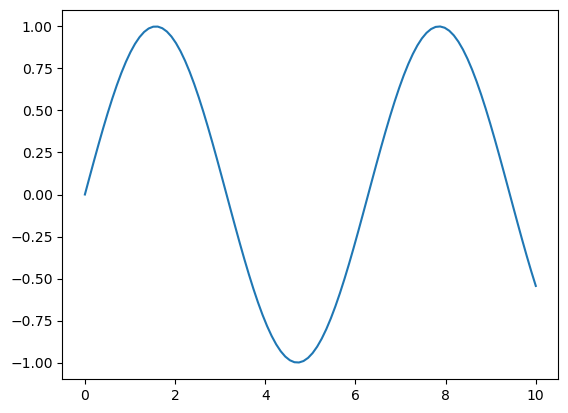

In [17]:
%matplotlib inline

%time
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()